## Advanced Finance Project-2
<br>
<br>


#1


In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
import sympy as sym
import statsmodels.api
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from sklearn.linear_model import LinearRegression
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

## Question - 1

In [ ]:
#Question - 1
#Reading the data from CSV file
df = pd.read_excel(r'btc_nov20change0F.xlsx', parse_dates=['Date'])

In [ ]:
df.head()

,Date,ret,Mkt-RF,Unnamed: 3,drxon,log_vol,volume,spx,nasdaq,vix,...,hashrate,mean hashrate,blox,diffic,mean diffic,inflows,outflows,transx,transf usd,transf
0,2017-02-01 00:00:00,0.023781,0,NaN,1,0.0,0.648393,0.002110,0.002123,-0.022376,...,0.019048,0.000864,0.019048,0.0,0.000000e+00,0.423231,0.545170,0.486776,0.048134,0.334910
1,2017-03-01 00:00:00,0.021580,0.83,NaN,1,0.0,0.047879,0.002106,0.002119,-0.022888,...,0.030962,0.006995,0.030962,0.0,0.000000e+00,0.346054,0.270039,0.066450,0.262790,0.050699
2,2017-04-01 00:00:00,0.099699,0.79,NaN,1,0.0,0.187204,0.005706,0.008788,-0.081016,...,-0.069429,0.003615,-0.069429,0.0,3.108620e-15,0.482525,0.429424,0.052829,0.196326,-0.045447
3,2017-05-01 00:00:00,-0.132271,-0.21,NaN,-1,0.0,0.599507,-0.000771,0.001995,-0.015306,...,-0.088795,0.001050,-0.088795,0.0,0.000000e+00,-0.009906,0.300932,-0.115382,0.296938,-0.152061
4,2017-06-01 00:00:00,-0.113482,0.29,NaN,-1,0.0,0.014978,0.003511,0.006017,-0.030450,...,0.139762,0.000898,0.139762,0.0,-3.110000e-15,-0.490144,-0.318161,0.168911,-0.523001,0.174644


In [ ]:
df['Date'].head()

0    2017-02-01 00:00:00
1    2017-03-01 00:00:00
2    2017-04-01 00:00:00
3    2017-05-01 00:00:00
4    2017-06-01 00:00:00
Name: Date, dtype: object

In [ ]:
# Reading the data from CSV file
df = pd.read_excel(r'btc_nov20change0F.xlsx', parse_dates=['Date'])

# Convert 'Date' column to datetime format, handling varying formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with missing dates
df.dropna(subset=['Date'], inplace=True)

# Filter dataframe based on date range
df = df.loc[(df['Date'] >= '2017-01-01') & (df['Date'] <= '2023-12-31')]

# Extract 'ret' column
ret = df['ret']

# Display the first few rows of the dataframe
print(df.head())

        Date       ret Mkt-RF  Unnamed: 3  drxon  log_vol    volume       spx  \
0 2017-02-01  0.023781      0         NaN      1      0.0  0.648393  0.002110   
1 2017-03-01  0.021580   0.83         NaN      1      0.0  0.047879  0.002106   
2 2017-04-01  0.099699   0.79         NaN      1      0.0  0.187204  0.005706   
3 2017-05-01 -0.132271  -0.21         NaN     -1      0.0  0.599507 -0.000771   
4 2017-06-01 -0.113482   0.29         NaN     -1      0.0  0.014978  0.003511   

     nasdaq       vix  ...  hashrate  mean hashrate      blox  diffic  \
0  0.002123 -0.022376  ...  0.019048       0.000864  0.019048     0.0   
1  0.002119 -0.022888  ...  0.030962       0.006995  0.030962     0.0   
2  0.008788 -0.081016  ... -0.069429       0.003615 -0.069429     0.0   
3  0.001995 -0.015306  ... -0.088795       0.001050 -0.088795     0.0   
4  0.006017 -0.030450  ...  0.139762       0.000898  0.139762     0.0   

    mean diffic   inflows  outflows    transx  transf usd    transf  
0  0

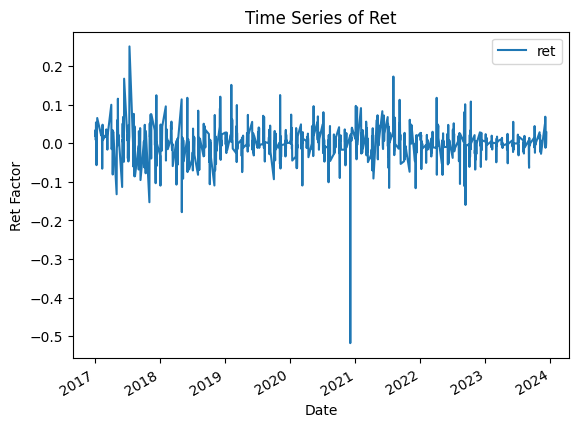

In [ ]:
#Part - 1
#Plotting the time series of value-weighted monthly factor returns for the Ret factor
df.plot(x = 'Date', y = 'ret')
plt.xlabel('Date')
plt.ylabel('Ret Factor')
plt.title('Time Series of Ret')
plt.show()

In [ ]:
#Calculating the annualized mean and standard deviation of this return series
annualized_mean = df['ret'].mean() * 12
annualized_std_dev = df['ret'].std() * math.sqrt(12)
print("Annualized Mean of this return series is: "+str(annualized_mean))
print("Annualized Standard Deviation of this return series is: "+str(annualized_std_dev))

Annualized Mean of this return series is: 0.009136492078269824
Annualized Standard Deviation of this return series is: 0.1437042020589517


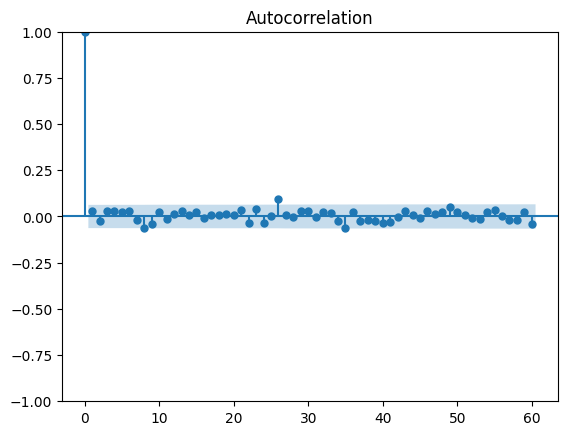

In [ ]:
#Part - 2
plot_acf(ret, lags = 60)
pyplot.show()

In [ ]:
ret_autocorrelation_coefficients = acf(ret, nlags=60, fft=False)  # Correction here

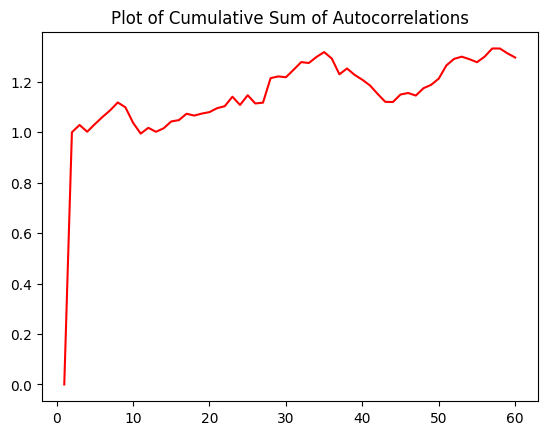

In [ ]:



#print("ret Autocorrelation Coefficients are as follows: ")
#print(ret_autocorrelation_coefficients)

def cumulative_sum_autocorrelations(n, ret_acr_coeff):
    cumsum_acr = 0
    for i in range(0, n):
        cumsum_acr += ret_acr_coeff[i]
    return cumsum_acr

cumulative_sum_acr = cumulative_sum_autocorrelations(5, ret_autocorrelation_coefficients)
#print("\nCumulative Sum of 5 Autocorrelations is: " +str(cumulative_sum_acr))

cumsum_acr_array = []
for i in range (0, 60):
    cumsum_acr_array.append(cumulative_sum_autocorrelations(i, ret_autocorrelation_coefficients))

x = np.linspace(1, 60, num = 60)
y = cumsum_acr_array
plt.title("Plot of Cumulative Sum of Autocorrelations")
plt.plot(x, y, color="red")

In [ ]:
# Check data types of 'Mkt-RF' and 'ret' columns
print(df['Mkt-RF'].dtype)
print(df['ret'].dtype)

object
float64


In [ ]:
# Convert non-numeric values to NaN
df['Mkt-RF'] = pd.to_numeric(df['Mkt-RF'], errors='coerce')

In [ ]:
df['ret'] = pd.to_numeric(df['ret'], errors='coerce')

In [ ]:
# Check data type after conversion
print(df['Mkt-RF'].dtype)

float64


In [ ]:
# Check data type after conversion
print(df['ret'].dtype)

float64


* Explanation of Plots:
As observed in the plot of cumulative sum of autocorrelations, the curve is increasing initially as we have positive autocorrelations for the first 20 orders. As we get more negative autocorrelations, the cumulative sum begins to reduce. The first plot of autocorrelation coefficients exhibits stationarity and therefore exhibits qualities of predictability as well as the first plot is largely centralised.

In [ ]:
#Part - 3
sm.stats.acorr_ljungbox(ret, lags=[6],return_df=True)

,lb_stat,lb_pvalue
6,4.822383,0.566787


* The p-value is smaller than 0.05. Hence we reject the null hypothesis, and it means that the RMW series exhibits autocorrelation.

In [ ]:
# Check the length of the DataFrame
print(len(df))

971


In [ ]:
print(df.index)

Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
       ...
       2435, 2436, 2437, 2438, 2439, 2440, 2441, 2442, 2443, 2444],
      dtype='int64', length=971)


In [ ]:
# Drop rows with NaN or infinite values in the 'ret' column
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['ret', 'Mkt-RF'])

# Define predictor and response variables
y = df['ret']
x = df[['Mkt-RF']]  # Using 'Mkt-RF' as the predictor variable

# Fit linear regression model
model = sm.OLS(y, x).fit()

# View model summary
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                    ret   R-squared (uncentered):                   0.101
Model:                            OLS   Adj. R-squared (uncentered):              0.100
Method:                 Least Squares   F-statistic:                              109.3
Date:                Sun, 28 Apr 2024   Prob (F-statistic):                    2.63e-24
Time:                        17:36:19   Log-Likelihood:                          1762.3
No. Observations:                 970   AIC:                                     -3523.
Df Residuals:                     969   BIC:                                     -3518.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In this analysis, we use linear regression to explore the relationship between the market factor ('Mkt-RF') and the return factor ('ret'). This model investigates how changes in past realized excess market returns influence the return factor, similar to the Ferson and Siegel procedure. This approach helps us gain insights into the potential efficiency of the return factor in relation to market signals.

In [ ]:
import statsmodels.api as sm

# Add a constant term to the predictor variable
x_with_const = sm.add_constant(x)

# Perform White's test
white_test = het_white(model.resid, x_with_const)
print(white_test)

(310.5344951668099, 3.7007619844493237e-68, 227.6744231696106, 9.445802392276004e-82)
